In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [3]:
df=pd.read_csv('/content/Wine_clust.csv')

In [4]:
df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


In [6]:
df.shape

(178, 13)

In [8]:
#must be done on scaled data
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaled_df=scaler.fit_transform(df)

- KMean clustering
- hierarchial clustering
- DBscan

# 1.KMeans

In [9]:
from sklearn.cluster import KMeans
WCSS =[]
ks = range(2,11)#k=1 only one cluster so k=2,minimum clustering

for k in ks:
  model=KMeans(n_clusters=k)
  model.fit(scaled_df)
  WCSS.append(model.inertia_)



In [10]:
WCSS

[1659.0328053127887,
 1277.928488844643,
 1226.555099013588,
 1136.5572218251518,
 1078.1260219582393,
 1003.4275372865967,
 954.7382967521462,
 936.186666738919,
 879.0627031117762]

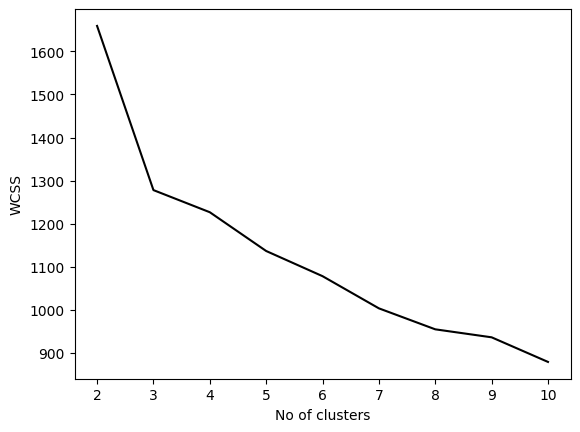

In [11]:
# elbow method
plt.plot(ks,WCSS,'-0')
plt.xlabel('No of clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
#k=2 -->3 sharp
#k=3-->4 smaller
#elbow k= 3

In [15]:
#select no of clusters
#give the clusters to kmean
model_kmeans =KMeans(n_clusters=3)
model_kmeans.fit(scaled_df)

KMeans(n_clusters=3)

In [18]:
from sklearn.metrics import silhouette_score
#Silhouette score --evaluation metrics used in unsupervised learning
labels = model_kmeans.fit_predict(scaled_df)

In [19]:
labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2], dtype=int32)

In [20]:
score = silhouette_score(scaled_df,labels)

In [21]:
score

np.float64(0.2806817957373884)

In [44]:
df['KMeans_cluster']= labels

# 2.Hierarchial clustering

In [23]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram,linkage

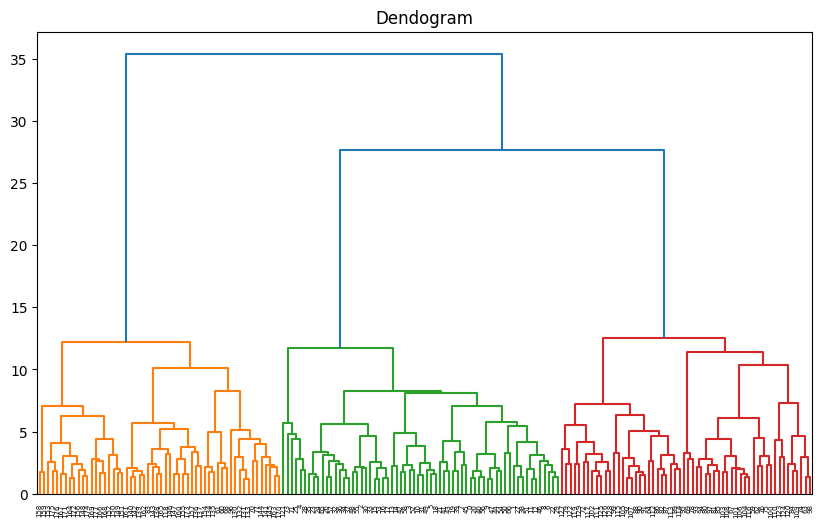

In [24]:
#Dendrogram-how data points are merged
#linkage=records merging steps
#dendogram=draws steps as a tree
linked = linkage(scaled_df,method='ward')

plt.figure(figsize=(10,6))
dendrogram(linked)
plt.title('Dendogram')
plt.show()

In [26]:
#Agglomerative clustering
#give the number of clusters as 3
cluster= AgglomerativeClustering(n_clusters=3)

In [30]:
labels_agg= cluster.fit_predict(scaled_df)

In [31]:
labels_agg

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 1, 1, 0, 0, 0, 2,
       2, 0, 1, 0, 1, 2, 0, 2, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

In [46]:
df['hierarchial_cluster']=labels_agg

In [32]:
#evaluation
silhouette_score(scaled_df,labels_agg)

np.float64(0.2774439826952265)

# 3.DBSCAN
- creates cluster based on density

In [33]:
from sklearn.cluster import DBSCAN

In [38]:
dbscan=DBSCAN(eps=1.5,min_samples=3)
db_labels=dbscan.fit_predict(scaled_df)

In [40]:
df['DBSCAN cluster' ]=db_labels
df['DBSCAN cluster' ].value_counts()

,count
DBSCAN cluster,
-1,147
0,6
1,5
6,4
5,4
4,3
3,3
2,3
7,3


In [41]:
print(np.unique(db_labels))

[-1  0  1  2  3  4  5  6  7]


In [42]:
#-1 means noise points
mask=db_labels != -1#select only points that are not noise

if len(set(db_labels[mask]))>1:

    score=silhouette_score(scaled_df[mask],db_labels[mask])
    print('silhouette_score:',score)
else:
  print('silhouette score cannot be calculted/not enough clusters.')


silhouette_score: 0.3310669271789284


- in dbscan clustering ,most datapoints identified as noise(_1).
- silhouette_score requires atleast two valid clusetrs,therefore,score could not be reliably computed when fewer than two valid clusters were formed.

In [47]:
df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,hierarchial_cluster,DBSCAN cluster,KMeans_cluster
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,2,1,2
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,2,-1,2
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,2,-1,2
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,2,-1,2
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,2,-1,2
